In [1]:
# importing the packages

import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [2]:
from scipy.stats import hmean, gmean

In [3]:
train = pd.read_csv(r'C:\Users\Grade A\Desktop\ANON\DATASET\ai\train.csv')
test = pd.read_csv(r'C:\Users\Grade A\Desktop\ANON\DATASET\ai\test.csv')
submission = pd.read_csv(r'C:\Users\Grade A\Desktop\ANON\DATASET\ai\submission.csv')

In [4]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [5]:
test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [6]:
train['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [7]:
len(submission)

16496

In [8]:
train.shape, test.shape

((38312, 19), (16496, 18))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

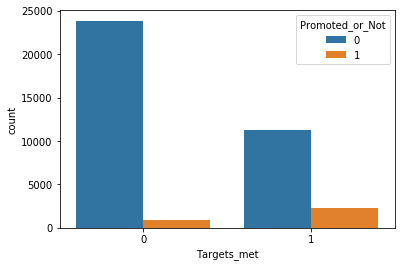

In [10]:
sns.countplot(train['Targets_met'], hue ='Promoted_or_Not', data=train)

In [11]:
train.dtypes[train.dtypes == 'object']

EmployeeNo                             object
Division                               object
Qualification                          object
Gender                                 object
Channel_of_Recruitment                 object
State_Of_Origin                        object
Foreign_schooled                       object
Marital_Status                         object
Past_Disciplinary_Action               object
Previous_IntraDepartmental_Movement    object
No_of_previous_employers               object
dtype: object

In [12]:
train.dtypes[train.dtypes =='int64']

Trainings_Attended        int64
Year_of_birth             int64
Year_of_recruitment       int64
Targets_met               int64
Previous_Award            int64
Training_score_average    int64
Promoted_or_Not           int64
dtype: object

In [13]:
train.dtypes[train.dtypes =='float64']

Last_performance_score    float64
dtype: object

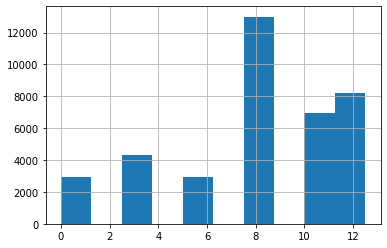

In [14]:
train['Last_performance_score'].hist()

In [15]:
train['Division']

0                     Commercial Sales and Marketing
1              Customer Support and Field Operations
2                     Commercial Sales and Marketing
3                     Commercial Sales and Marketing
4                           Information and Strategy
                            ...                     
38307    Information Technology and Solution Support
38308          Customer Support and Field Operations
38309                       Information and Strategy
38310                 Commercial Sales and Marketing
38311                           People/HR Management
Name: Division, Length: 38312, dtype: object

In [16]:
train['Qualification']

0           MSc, MBA and PhD
1        First Degree or HND
2        First Degree or HND
3        First Degree or HND
4        First Degree or HND
                ...         
38307    First Degree or HND
38308       MSc, MBA and PhD
38309    First Degree or HND
38310                    NaN
38311    First Degree or HND
Name: Qualification, Length: 38312, dtype: object

In [17]:
train['Gender']

0        Female
1          Male
2          Male
3          Male
4          Male
          ...  
38307    Female
38308    Female
38309      Male
38310      Male
38311      Male
Name: Gender, Length: 38312, dtype: object

In [18]:
train['Channel_of_Recruitment']

0        Direct Internal process
1              Agency and others
2        Direct Internal process
3              Agency and others
4        Direct Internal process
                  ...           
38307    Direct Internal process
38308          Agency and others
38309          Agency and others
38310    Direct Internal process
38311          Agency and others
Name: Channel_of_Recruitment, Length: 38312, dtype: object

In [19]:
train['Foreign_schooled']

0         No
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
38307    Yes
38308    Yes
38309     No
38310    Yes
38311    Yes
Name: Foreign_schooled, Length: 38312, dtype: object

In [20]:
train['Marital_Status']

0        Married
1        Married
2        Married
3         Single
4        Married
          ...   
38307    Married
38308    Married
38309    Married
38310    Married
38311     Single
Name: Marital_Status, Length: 38312, dtype: object

In [21]:
train['Past_Disciplinary_Action']

0        No
1        No
2        No
3        No
4        No
         ..
38307    No
38308    No
38309    No
38310    No
38311    No
Name: Past_Disciplinary_Action, Length: 38312, dtype: object

In [22]:
train['Previous_IntraDepartmental_Movement']

0        No
1        No
2        No
3        No
4        No
         ..
38307    No
38308    No
38309    No
38310    No
38311    No
Name: Previous_IntraDepartmental_Movement, Length: 38312, dtype: object

In [23]:
train['Previous_IntraDepartmental_Movement'] = train['Previous_IntraDepartmental_Movement'].replace({'Yes':1, 'No':0})
train['Past_Disciplinary_Action'] = train['Past_Disciplinary_Action'].replace({'Yes':1, 'No':0})
train['Marital_Status'] = train['Marital_Status'].replace({'Married':1, 'Single':0})
train['Foreign_schooled'] = train['Foreign_schooled'].replace({'Yes':1, 'No':0})
train['Channel_of_Recruitment'] = train['Channel_of_Recruitment'].replace({'Direct Internal process':1, 'Agency and others':0})
train['Gender'] = train['Gender'].replace({'Male':1, 'Female':0})
train['Qualification'] = train['Qualification'].replace({'MSc, MBA and PhD':1, 'First Degree or HND':0})


In [24]:
test['Previous_IntraDepartmental_Movement'] = test['Previous_IntraDepartmental_Movement'].replace({'Yes':1, 'No':0})
test['Past_Disciplinary_Action'] = test['Past_Disciplinary_Action'].replace({'Yes':1, 'No':0})
test['Marital_Status'] = test['Marital_Status'].replace({'Married':1, 'Single':0})
test['Foreign_schooled'] = test['Foreign_schooled'].replace({'Yes':1, 'No':0})
test['Channel_of_Recruitment'] = test['Channel_of_Recruitment'].replace({'Direct Internal process':1, 'Agency and others':0})
test['Gender'] = test['Gender'].replace({'Male':1, 'Female':0})
test['Qualification'] = test['Qualification'].replace({'MSc, MBA and PhD':1, 'First Degree or HND':0})


In [25]:
train.describe()

,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,0.701608,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.913421,0.003941,0.094044,0.084595
std,0.457558,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.281220,0.062657,0.291893,0.278282
min,0.000000,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
train.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [27]:
train.fillna(-99, inplace = True)
test.fillna(-99, inplace= True)

In [28]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,1,0,1,2,1986,12.5,2011,1,0,41,ANAMBRA,0,1,0,0,0,0
1,YAK/S/00002,Customer Support and Field Operations,0,1,0,2,1991,12.5,2015,0,0,52,ANAMBRA,1,1,0,0,0,0
2,YAK/S/00003,Commercial Sales and Marketing,0,1,1,2,1987,7.5,2012,0,0,42,KATSINA,1,1,0,0,0,0
3,YAK/S/00004,Commercial Sales and Marketing,0,1,0,3,1982,2.5,2009,0,0,42,NIGER,1,0,0,0,1,0
4,YAK/S/00006,Information and Strategy,0,1,1,3,1990,7.5,2012,0,0,77,AKWA IBOM,1,1,0,0,1,0


In [29]:
test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,0,1,0,2,1976,7.5,2017,0,0,65,FCT,1,1,0,0,1
1,YAK/S/00011,Information Technology and Solution Support,-99,1,1,2,1991,0.0,2018,0,0,69,OGUN,1,1,0,0,1
2,YAK/S/00015,Research and Innovation,1,1,1,2,1984,7.5,2012,0,0,76,KANO,1,1,0,0,1
3,YAK/S/00016,Customer Support and Field Operations,0,1,0,2,1984,2.5,2009,0,0,52,RIVERS,0,0,0,0,1
4,YAK/S/00017,Information Technology and Solution Support,0,1,0,2,1983,7.5,2014,1,0,69,FCT,1,1,0,0,0


In [30]:
train = train.drop('Division', axis=1)
test = test.drop('Division', axis=1)

In [31]:
train = train.drop('State_Of_Origin', axis=1)
test = test.drop('State_Of_Origin', axis=1)

In [32]:
train = train.drop('Qualification', axis=1)
test = test.drop('Qualification', axis=1)

In [33]:
train = train.drop('Channel_of_Recruitment', axis=1)
test = test.drop('Channel_of_Recruitment', axis=1)

In [34]:
train = train.drop('Marital_Status', axis=1)
test = test.drop('Marital_Status', axis=1)

In [36]:
train.head()

,EmployeeNo,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Promoted_or_Not
0,YAK/S/00001,0,2,1986,12.5,2011,1,0,41,0,0,0,0
1,YAK/S/00002,1,2,1991,12.5,2015,0,0,52,1,0,0,0
2,YAK/S/00003,1,2,1987,7.5,2012,0,0,42,1,0,0,0
3,YAK/S/00004,1,3,1982,2.5,2009,0,0,42,1,0,0,0
4,YAK/S/00006,1,3,1990,7.5,2012,0,0,77,1,0,0,0


In [37]:
train['divisional'] = train['Trainings_Attended'] + train['Last_performance_score']
train['divisional'] = train['Trainings_Attended'] + train['Targets_met']
train['divisional'] = train['Trainings_Attended'] + train['Previous_Award']

In [38]:
test['divisional'] = test['Trainings_Attended'] + test['Last_performance_score']
test['divisional'] = test['Trainings_Attended'] + test['Targets_met']
test['divisional'] = test['Trainings_Attended'] + test['Previous_Award']

In [40]:
train['statea'] = train['Foreign_schooled'].round(1)
test['statea'] = test['Foreign_schooled'].round(1)

In [41]:
def marital(x):
    if x == -1.0:
        return 1
    elif x ==0.0 :
        return 2
    elif x == 0.4:
        return 3
    elif x == 0.5:
        return 4
    elif x == 13.8:
        return 5
    elif x == 21.8:
        return 6
    elif x == 24.5:
        return 7
    elif x == 24.7:
        return 8
    elif x == 26.1:
        return 9
    elif x == 27.3:
        return 10
    else:
        return 12

In [43]:
train['marital'] = train['statea'].apply(marital)
test['marital'] = test['statea'].apply(marital)

In [44]:
train.corr()

,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Promoted_or_Not,divisional,statea,marital
Gender,1.000000,0.084906,0.012095,-0.023586,0.017644,-0.038382,0.001773,-0.024311,0.016073,0.012799,-0.002715,-0.010437,0.083001,0.016073,0.016073
Trainings_Attended,0.084906,1.000000,0.078710,-0.062042,0.056215,-0.044789,-0.007409,0.041065,-0.005108,-0.002260,-0.005871,-0.024345,0.970777,-0.005108,-0.005108
Year_of_birth,0.012095,0.078710,1.000000,-0.175572,0.654666,0.025337,0.013627,0.048390,-0.001877,-0.000251,0.011412,0.017991,0.079820,-0.001877,-0.001877
Last_performance_score,-0.023586,-0.062042,-0.175572,1.000000,-0.190333,0.276350,0.026587,0.057836,-0.001923,-0.003065,-0.005478,0.119690,-0.053959,-0.001923,-0.001923
Year_of_recruitment,0.017644,0.056215,0.654666,-0.190333,1.000000,0.076910,0.041995,0.037477,-0.000253,0.003217,0.004988,0.012287,0.064751,-0.000253,-0.000253
Targets_met,-0.038382,-0.044789,0.025337,0.276350,0.076910,1.000000,0.092934,0.077201,-0.004294,-0.000264,-0.002965,0.224518,-0.021256,-0.004294,-0.004294
Previous_Award,0.001773,-0.007409,0.013627,0.026587,0.041995,0.092934,1.000000,0.072360,0.002960,-0.001374,-0.009762,0.201434,0.232786,0.002960,0.002960
Training_score_average,-0.024311,0.041065,0.048390,0.057836,0.037477,0.077201,0.072360,1.000000,0.000796,-0.006620,-0.000237,0.178448,0.057304,0.000796,0.000796
Foreign_schooled,0.016073,-0.005108,-0.001877,-0.001923,-0.000253,-0.004294,0.002960,0.000796,1.000000,-0.001373,-0.000018,0.003202,-0.004258,1.000000,1.000000
Past_Disciplinary_Action,0.012799,-0.002260,-0.000251,-0.003065,0.003217,-0.000264,-0.001374,-0.006620,-0.001373,1.000000,-0.000286,0.004830,-0.002527,-0.001373,-0.001373


In [45]:
train.to_csv('insure1_train.csv', index=False)
test.to_csv('insure1_test.csv', index=False)

In [46]:
train.isnull().sum()

EmployeeNo                             0
Gender                                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
Foreign_schooled                       0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
Promoted_or_Not                        0
divisional                             0
statea                                 0
marital                                0
dtype: int64